<a href="https://colab.research.google.com/github/butronx/Arduino_butronx/blob/master/Heartdiseasepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. PROJECT TITLE:**

###Predicting Heart Disease in Patients.

# **B. TITLE BLOCK**

# **C. PROBLEM OVERVIEW AND ABOUT DATASET.**

##### **Context:**
Heart disease is the leading cause of death in the World. it is therefore pertinent that further work is done to helpd predict the risk of heart attack in patients

The dataset Heart_Disease_uci.csv will be utilised to predict which patients are most likely to suffer from heart disease using features in the dataset such as Id, Age, Sex, CP, #Trestbps, Chol, Fbs, Restecg, #Thalch <br><br>


##### **Source of Dataset:**
The datset can be located via this hyperlink: —
kaggle.com/code/arnoldyanga/heart.disease-multi-class classification/input.

# **D. PRELIM.**

### IMPORT PIVOT LIBRARIES.

In [ ]:
#import modules/lib needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### LOADING THE DATASET INTO DATAFRAME.

In [ ]:
# Mounting the Drive.

from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Declaring Dataset Filepath.
#path = "/content/drive/MyDrive/dataset/heart_disease.csv"
#path1 = "/content/drive/MyDrive/MyDatasets/gp7_v22_heart_disease_uci.csv"
path2 = "/content/gp7_v22_heart_disease_uci.csv"

In [ ]:
# Reading Dataset & Loading into DataFrame.
df = pd.read_csv(path2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gp7_v22_heart_disease_uci.csv'

### CREATING AN ATTRIBUTE DICTIONARY AND FRAMELIST.

In [ ]:
# The Column Attribute (Frame-list) of the DataFrame.
df.columns

In [ ]:
# The Attributes Dictionary.

Patient = {
    """DICTIONARY OF ALL THE ATTRIBUTES IN
    THIS DATAFTAME"""
    "Id": 'unique identity',
    "Age": 'Patient`s age in years',
    "Sex": 'Gender (Male or Female)',
    "Dataset": 'Location of data collection',
    "Chol": 'Cholesterol measure (mg/dl)',
    "CP": 'Chest pain type',
    "trestbps": 'Resting blood pressure',
    "Fbs": 'Fasting blood sugar',
    "restecg": 'ecg observation at resting condition',
    "Thalch": 'Maximum heart rate achieved',
    "exang": 'Exercise-induced angina',
    "oldpeak": 'ST depression induced by exercise relative to rest',
    "slope" : 'Slope of the peak exercise ST segment',
    "ca" : 'Number of major vessels colored by fluoroscopy',
    "thal" : 'Thalassemia (blood disorder) diagnosis',
    "num" : 'Number of vessels diseased',
}

In [ ]:
print(Patient)

In [ ]:
# Attributes Framelist for Different Sub-datasets.

# Framelist for Yeye Attributes.
YEYE = ['id', 'dataset']

# Framelist for Categorical Attributes.
CATCAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num']

# Framelist for Numerical Attributes.
NUMCAL_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Framelist for Lettered Categorical Attributes.
LCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal']

# Framelist for Non-lettered Categorical Attributes.
NCATCAL_COLS = ['fbs', 'exang', 'ca']

# Framelist for Truth-labeled Attributes.
TCATCAL_COLS = ['fbs', 'exang']

# Framelist of Encodable Categorical Features.
ENCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

# Framelist for Any Number Valued Column (NUMCAL_COLS + NCATCAL_COLS).
NUMVAL = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']

# Framelist for Target.
TARGET = ['num']

# Framelist for Features.
features_df = df.drop(columns=['num'])
FEATURES = features_df.columns

In [ ]:
FEATURES

# **E. DATA EXPLORATION.**

In [ ]:
# View Summary Info of Dataframe.
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# View 15 Head Records.
df.head(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
# View 10 Tail Records.
df.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,911,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,912,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,913,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
# Statistical Description of Numerical Attributes.
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Inspect Categorical Columns.
# name, n(uniques+na), n(isnull), valcounts+na, dtype.
#
columns3 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns3 = CATCAL_COLS
#
for i in columns3:
    print("\n**********")
    print(f"Column: {i};  {df[i].nunique(dropna=False)} unique labels (nullic)")
    print("****")
    print(f"{df[i].isnull().sum()} null values")
    print("****")
    print("valuecounts (nullic)")
    print(df[i].value_counts(dropna=False))


**********
Column: sex;  2 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
sex
Male      726
Female    194
Name: count, dtype: int64

**********
Column: cp;  4 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

**********
Column: fbs;  3 unique labels (nullic)
****
90 null values
****
valuecounts (nullic)
fbs
False    692
True     138
NaN       90
Name: count, dtype: int64

**********
Column: restecg;  4 unique labels (nullic)
****
2 null values
****
valuecounts (nullic)
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
NaN                   2
Name: count, dtype: int64

**********
Column: exang;  3 unique labels (nullic)
****
55 null values
****
valuecounts (nullic)
exang
False    528
True     337
NaN       55
Name: count, dtype: int64

**********
Column: slope;  4 unique labels (nullic)
****
309 nu

# **F. DATA CLEANING & PROCESSING (DCP).**

### ATTRIBUTE VISUALIZATION

##### NUMERICAL DATA.

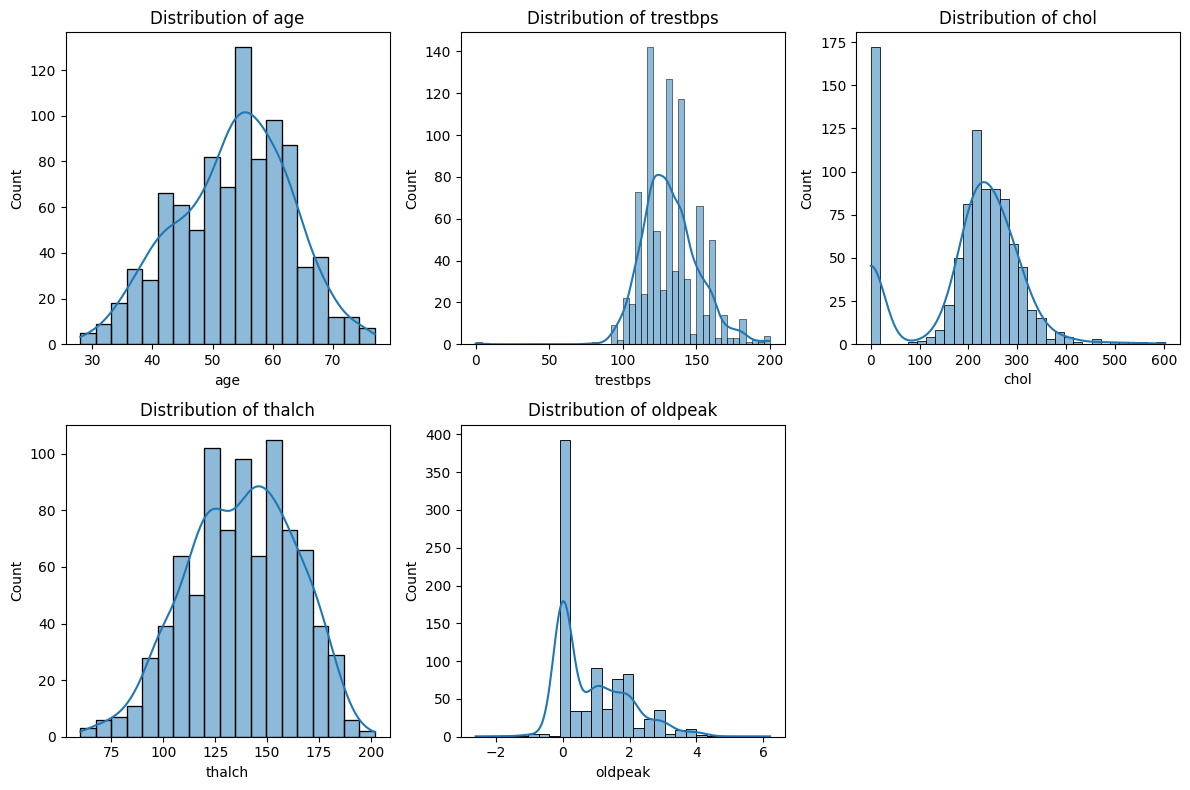

In [ ]:
# hist + kde for catcal columns.
import math
# Sns hist wt Kde=True pmtr for whole dframe.
#
# CATCAL_COLS = ['col1',...., 'col7']
n = len(NUMCAL_COLS)
plt.figure(figsize=(12, 8))
for i, column in enumerate(NUMCAL_COLS, 1):
    plt.subplot(2, math.ceil(n/2), i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

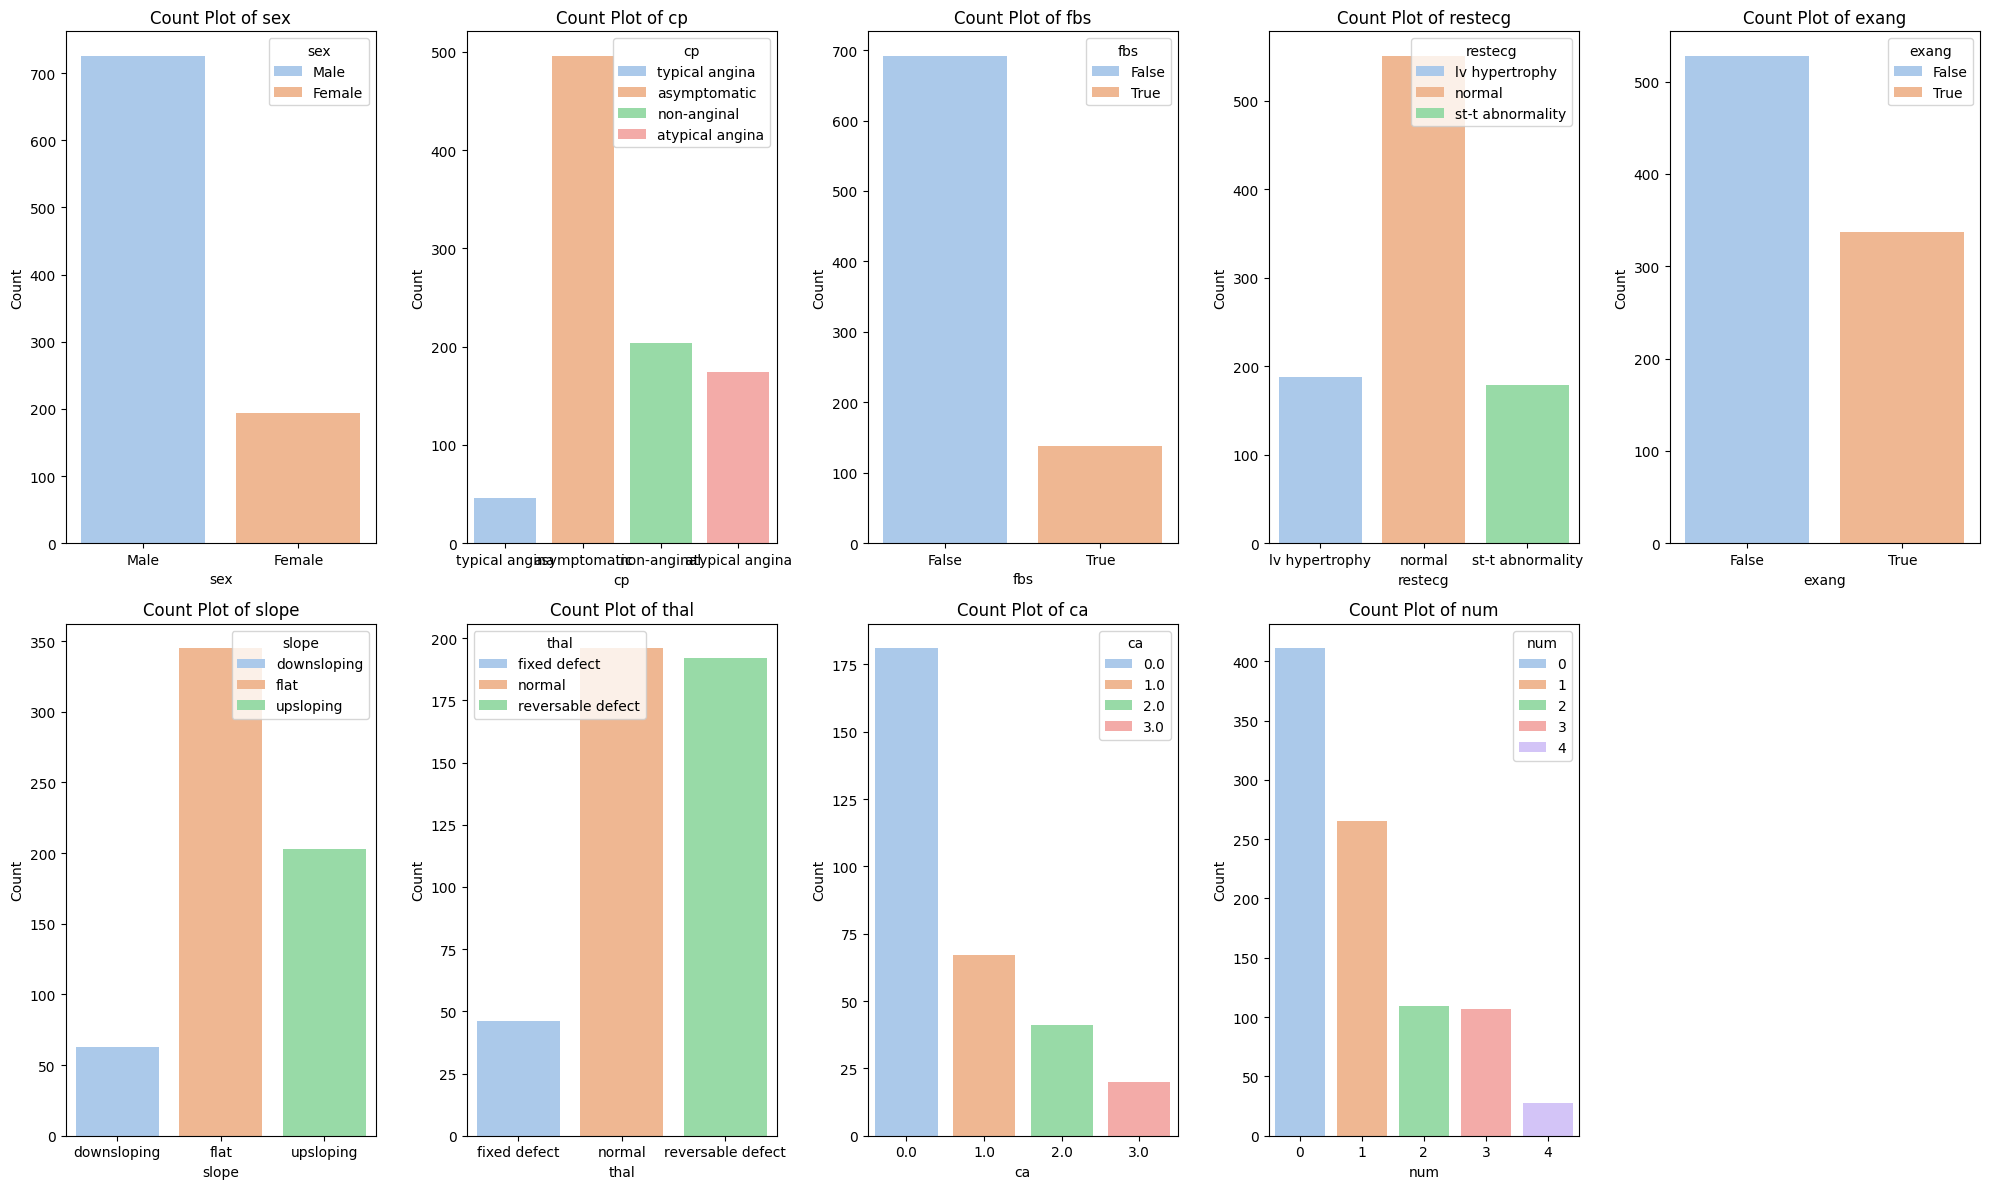

In [ ]:
# Categorical Data Visualisation.

# List of categorical columns.

cat_cols = CATCAL_COLS
df1 = df

# Define number of rows and columns
rows = 2  # Fixed to 2 rows
cols = math.ceil(len(cat_cols) / rows)  # Calculate needed columns

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 6 * rows))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Loop through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df1[col], hue=df1[col], ax=axes[i], palette='pastel', legend=True)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()

### DROPPING YEYE ATTRIBUTES.

In [ ]:
# Yeye Attributes Framelist.
YEYE = ['id', 'dataset']

# Dropping Yeye Attributes.
df = df.drop(['id', 'dataset'], axis=1)

In [ ]:
# Verify Yeye Attributes Successfully Dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


### HANDLING INFINITY.

Infinity values need handling because they are very likely overshadow statistical inferences of other coordinate values in same field or record as the case may be.

In [ ]:

# Detecting Infinity in Numerical Columns.
np.isinf(df[NUMCAL_COLS])

,age,trestbps,chol,thalch,oldpeak
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
915,False,False,False,False,False
916,False,False,False,False,False
917,False,False,False,False,False
918,False,False,False,False,False


In [ ]:
# Detecting Infinity Counts.
np.isinf(df[NUMCAL_COLS]).sum()

,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0


INFERENCE: No infinite value was detected in dataframe.

### DUPLICITY DETECTION HANDLING.

Duplicity is the presense of duplicate records in a dataframe.

In [ ]:
# Detecting Duplicity.

df.duplicated().sum()

2

In [ ]:
# View Exact Duplicate Records.

duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
404,49,Female,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
405,49,Female,atypical angina,110.0,NaN,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
859,58,Male,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,2
907,58,Male,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,2


In [ ]:
# Remove Duplicates.
df = df.drop_duplicates()

In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  859 non-null    float64
 4   chol      889 non-null    float64
 5   fbs       828 non-null    object 
 6   restecg   916 non-null    object 
 7   thalch    863 non-null    float64
 8   exang     863 non-null    object 
 9   oldpeak   856 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.6+ KB


In [ ]:
# Confirming Duplicity Removal.

df.duplicated().sum()

0

### HANDLING MISSINGNESS.

Missingness is the presense of missing values, MVs in a given data.

##### Detection & Visualisation of Missingness.

In [ ]:
##### Detection of Missingness.
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [ ]:
# Column Counts of Missing Values.
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,29
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [ ]:
# Column Percentage of Missing Values.
df_null_percent = df.isnull().sum()/len(df)*100

df_null_percent

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,6.427015
chol,3.159041
fbs,9.803922
restecg,0.217865
thalch,5.991285
exang,5.991285
oldpeak,6.753813


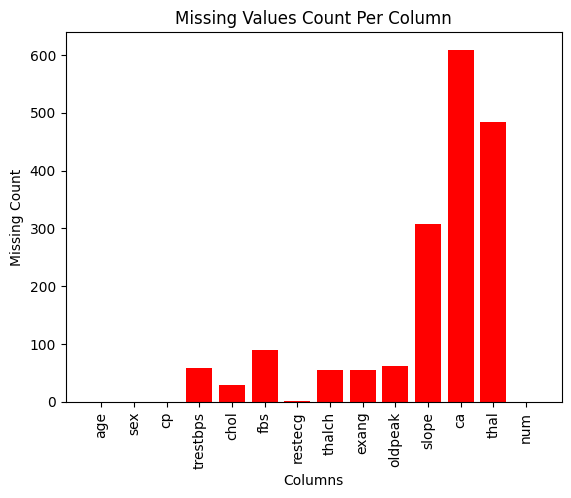

In [ ]:
# Visualisation of Missingness of Columns Using Barplot.

missing_counts = df.isnull().sum()
plt.bar(df.columns, missing_counts, color='red')
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.title("Missing Values Count Per Column")
plt.xticks(rotation=90)  # Corrected line
plt.show()

<Axes: >

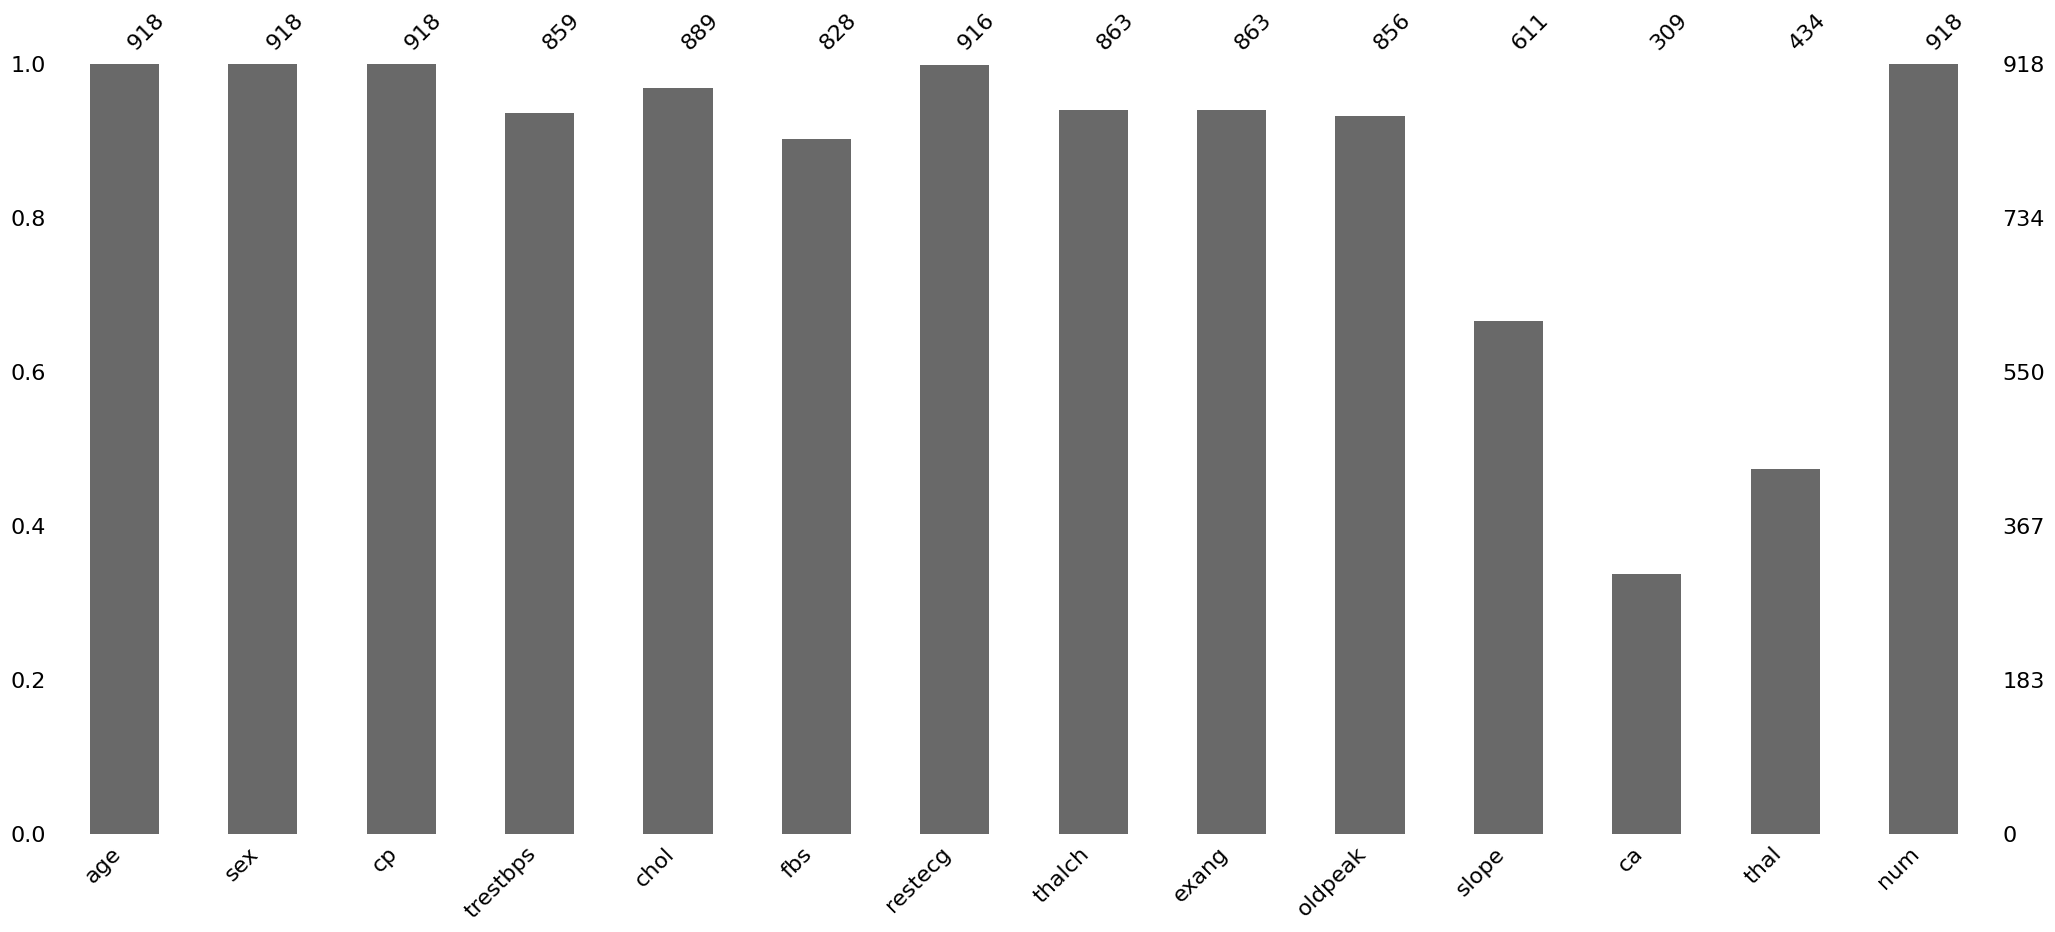

In [ ]:
# Visualize the Relative Missingness of the Columns Using Msnoplot.
import missingno as msno
msno.bar(df)

### Dealing with missing value

In [ ]:
#df['thal'] = df['thal'].astype(str).str.strip().replace('nan', None)
#df['slope'] = df['slope'].astype(str).str.strip().replace('nan', None)

In [ ]:
#Dealing with missing value

df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])

In [ ]:



#Dealing with missing value

NUMVAL2 = ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']

for i in ["thal", "slope" ]:
    df[i] = df[i].fillna(df[i].mode())



for j in NUMVAL2:
    df[j] = df[j].fillna(df[j].mean())

In [ ]:

# Dealing with missing values.

# Target columns.
columns03 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns03 = NUMVAL
# Fill with mean values.
print("Output1:", df.isnull().sum())

for col3 in columns03:
    df[col3] = df[col3].fillna(df[col3].mean())
#
print("\n\n********")

Output1: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     2
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


********


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    object 
 6   restecg   916 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  ca        918 non-null    float64
 12  thal      918 non-null    object 
 13  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.6+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.137369,199.107987,137.542294,0.880841,0.676375,0.995643
std,9.432617,18.440088,109.074413,25.146684,1.054122,0.542257,1.142985
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.000000,0.676375,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,0.676375,1.000000
75%,60.000000,140.000000,267.000000,155.750000,1.500000,0.676375,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,62,Male,typical angina,132.137369,139.0,False,st-t abnormality,137.542294,0.38934,0.880841,flat,0.676375,normal,0
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,58,Male,asymptomatic,132.137369,385.0,True,lv hypertrophy,137.542294,0.38934,0.880841,flat,0.676375,normal,0


In [ ]:


%%script no
# Dealing with missing values.

# Target columns.
#columns02 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns02 = LCATCAL_COLS

print("Output1:", df.isnull().sum())

# Fill with mode values.
for col2 in columns03:
    #df_[col2] = df_[col2].fillna(df[col3].mean())
    df_2[col2] = df_2[col2].astype(str).str.strip().replace(pd.NA, None)
    df_2[col2] = df_2[col2].fillna(df_2[col2].mode())

#
print("\n\n********")
print("Output2:", df_2.isnull().sum())

Couldn't find program: 'no'


In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     2
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
df.shape

(918, 14)

In [ ]:
#thal_column = df.pop('thal')
#df_2.insert(12, 'thal', thal_column)

In [ ]:
# Inspect Categorical Columns.
# name, n(uniques+na), n(isnull), valcounts+na, dtype.
#
#columns3 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns3 = CATCAL_COLS
#
for i in columns3:
    print("\n\n**********")
    print(f"Column: {i};  {df[i].nunique(dropna=False)} unique labels (nullic)")
    print("****")
    print(f"{df[i].isnull().sum()} null values")
    print("****")
    print("valuecounts (nullic)")
    print(df[i].value_counts(dropna=False))



**********
Column: sex;  2 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
sex
Male      725
Female    193
Name: count, dtype: int64


**********
Column: cp;  4 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
cp
asymptomatic       496
non-anginal        203
atypical angina    173
typical angina      46
Name: count, dtype: int64


**********
Column: fbs;  3 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
fbs
False       690
True        138
0.166667     90
Name: count, dtype: int64


**********
Column: restecg;  4 unique labels (nullic)
****
2 null values
****
valuecounts (nullic)
restecg
normal              550
lv hypertrophy      188
st-t abnormality    178
NaN                   2
Name: count, dtype: int64


**********
Column: exang;  3 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
exang
False      527
True       336
0.38934     55
Name: count, dtype: int64


**********
Column: slope;  3 unique labels (

In [ ]:
df['exang'] = pd.to_numeric(df['exang'], errors='coerce') >= 0.5
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce') >= 0.5

In [ ]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    bool   
 6   restecg   916 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    bool   
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  ca        918 non-null    float64
 12  thal      918 non-null    object 
 13  num       918 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 95.0+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,62,Male,typical angina,132.137369,139.0,False,st-t abnormality,137.542294,False,0.880841,flat,0.676375,normal,0
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,58,Male,asymptomatic,132.137369,385.0,True,lv hypertrophy,137.542294,False,0.880841,flat,0.676375,normal,0
919,62,Male,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,flat,0.676375,normal,1


In [ ]:
df['exang'] = df['exang'] >= 0.5
df['fbs'] = df['fbs'] >= 0.5

In [ ]:
df['ca'] = df['ca'].apply(math.ceil)

In [ ]:
# Inspect Categorical Columns.
# name, n(uniques+na), n(isnull), valcounts+na, dtype.
#
#columns3 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns3 = CATCAL_COLS
#
for i in columns3:
    print("\n\n**********")
    print(f"Column: {i};  {df[i].nunique(dropna=False)} unique labels (nullic)")
    print("****")
    print(f"{df[i].isnull().sum()} null values")
    print("****")
    print("valuecounts (nullic)")
    print(df[i].value_counts(dropna=False))



**********
Column: sex;  2 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
sex
Male      725
Female    193
Name: count, dtype: int64


**********
Column: cp;  4 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
cp
asymptomatic       496
non-anginal        203
atypical angina    173
typical angina      46
Name: count, dtype: int64


**********
Column: fbs;  2 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
fbs
False    780
True     138
Name: count, dtype: int64


**********
Column: restecg;  4 unique labels (nullic)
****
2 null values
****
valuecounts (nullic)
restecg
normal              550
lv hypertrophy      188
st-t abnormality    178
NaN                   2
Name: count, dtype: int64


**********
Column: exang;  2 unique labels (nullic)
****
0 null values
****
valuecounts (nullic)
exang
False    582
True     336
Name: count, dtype: int64


**********
Column: slope;  3 unique labels (nullic)
****
0 null values
****
valuecoun

In [ ]:
print("Output1:", df.isnull().sum())

for col3 in columns03:
    df[col3] = df[col3].fillna(df[col3].mean())

print("\n\n********")
print("Output2:", df.isnull().sum())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    bool   
 6   restecg   916 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    bool   
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  ca        918 non-null    int64  
 12  thal      918 non-null    object 
 13  num       918 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 95.0+ KB


In [ ]:
nan_rows = df.loc[df['restecg'].isnull()]
nan_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,55,Male,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,flat,1,normal,1
598,34,Male,asymptomatic,115.0,0.0,False,NaN,154.0,False,0.2,upsloping,1,normal,1


In [ ]:
df = df.dropna(subset=['restecg'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    int64  
 1   sex       916 non-null    object 
 2   cp        916 non-null    object 
 3   trestbps  916 non-null    float64
 4   chol      916 non-null    float64
 5   fbs       916 non-null    bool   
 6   restecg   916 non-null    object 
 7   thalch    916 non-null    float64
 8   exang     916 non-null    bool   
 9   oldpeak   916 non-null    float64
 10  slope     916 non-null    object 
 11  ca        916 non-null    int64  
 12  thal      916 non-null    object 
 13  num       916 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 94.8+ KB


**SDA**

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['slope'], df['thal'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-Square statistic: 5.77218032913437
p-value: 0.21682024962032173
Degrees of freedom: 4


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['slope'], df['thal'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
rcorr = r - ((r - 1) ** 2) / (n - 1)
kcorr = k - ((k - 1) ** 2) / (n - 1)
cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

print("Cramer's V:", cramers_v)

Cramer's V: 0.03109782838116761


In [ ]:
# Display descriptive statistics EXPLORATORY ANALYSIS
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.530568,132.147494,199.220668,137.526011,0.882546,0.890830,0.995633
std,9.420716,18.449701,108.948811,25.168215,1.054630,0.564024,1.144234
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,1.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Separate numeric and categorical variables for visualization purposes EXPLORATORY ANALYSIS

heart_cat = df[CATCAL_COLS]
heart_num = df[NUMCAL_COLS]

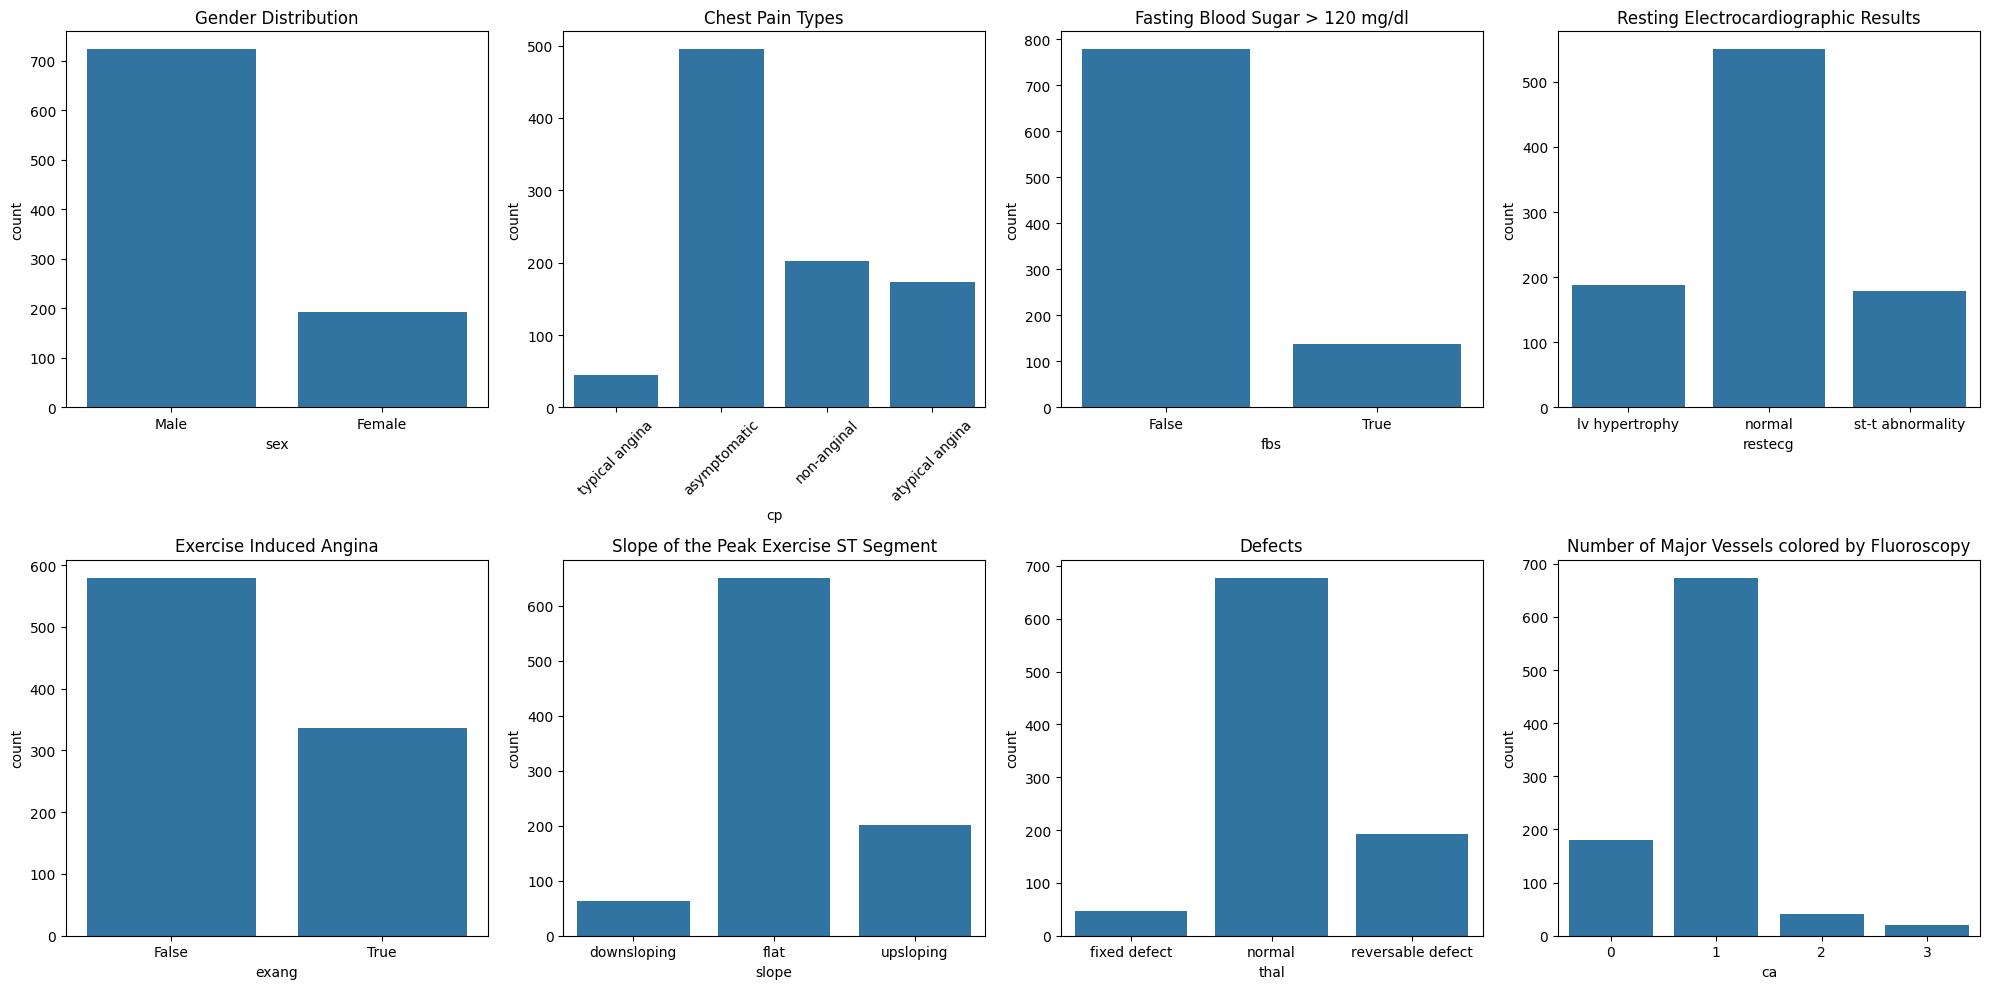

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns and titles
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
titles = ['Gender Distribution', 'Chest Pain Types', 'Fasting Blood Sugar > 120 mg/dl',
          'Resting Electrocardiographic Results', 'Exercise Induced Angina',
          'Slope of the Peak Exercise ST Segment', 'Defects',
          'Number of Major Vessels colored by Fluoroscopy']

# Create the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Loop through the columns and axes
for i, (column, title, ax) in enumerate(zip(columns, titles, axes.flat)):
    sns.countplot(x=column, data=heart_cat, ax=ax)
    ax.set_title(title)
    if column == 'cp':  # Rotate x-axis labels for 'cp' column
        ax.tick_params(axis='x', rotation=45)

# Layout so plots do not overlap
plt.tight_layout()
plt.show()

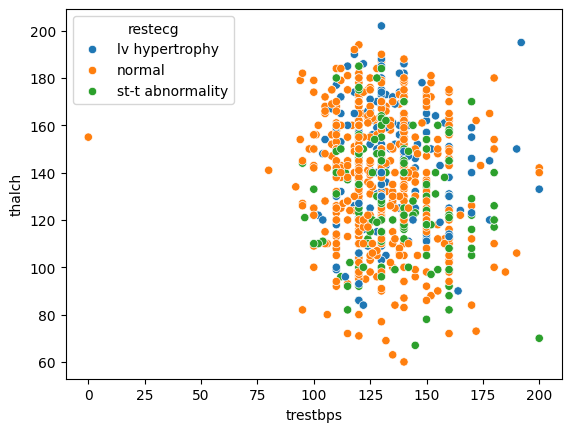

In [ ]:
sns.scatterplot(x='trestbps', y='thalch', hue='restecg', data=df)
plt.show()

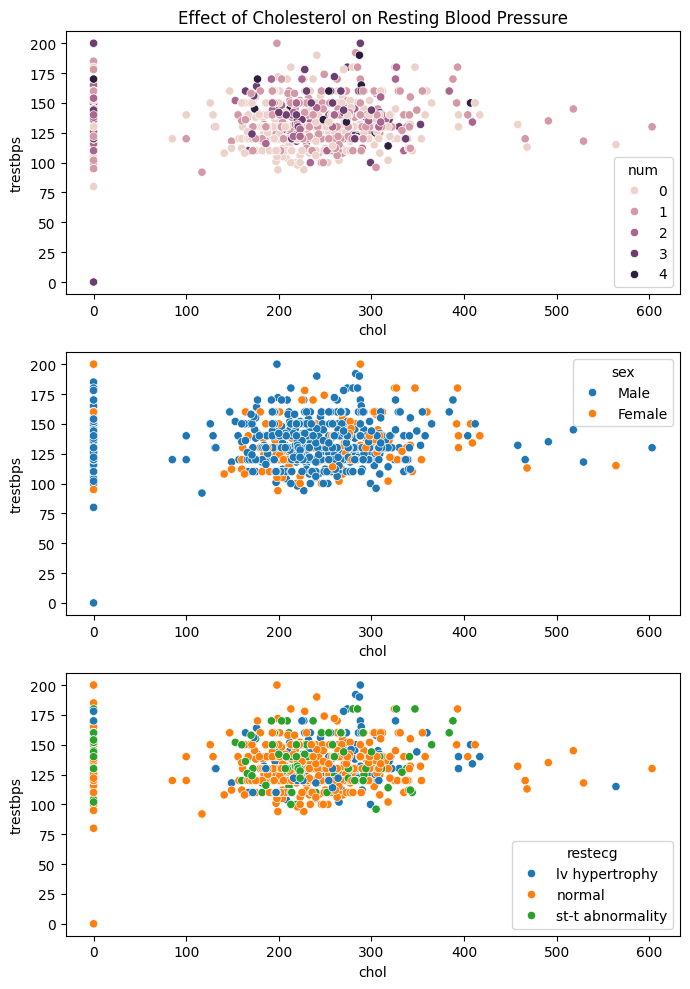

In [ ]:
fig, axes = plt.subplots(3, figsize=(7,10))

axes[0].set_title('Effect of Cholesterol on Resting Blood Pressure')
sns.scatterplot(x='chol', y='trestbps', hue='num', data=df, ax=axes[0])
sns.scatterplot(x='chol', y='trestbps', hue='sex', data=df, ax=axes[1])
sns.scatterplot(x='chol', y='trestbps', hue='restecg', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('num').mean(numeric_only=True)

,index,id,age,trestbps,chol,thalch,oldpeak,ca
num,,,,,,,,
0,354.257908,355.257908,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,541.898113,542.898113,53.528302,132.861111,195.255814,131.035714,1.001200,0.741379
2,553.449541,554.449541,57.577982,133.613861,143.859813,128.666667,1.353465,1.222222
3,559.467290,560.467290,59.214953,136.152174,159.716981,120.500000,1.581319,1.459459
4,476.714286,477.714286,59.214286,138.720000,192.148148,127.846154,2.307692,1.692308


In [ ]:
print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
print(pd.crosstab(index=df.num, columns=df.cp, values=df.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Patient Gender')
print(pd.crosstab(index=df.num, columns=df.sex, values=df.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Cardiographic Results')
print(pd.crosstab(index=df.num, columns=df.restecg, values=df.chol, aggfunc=np.mean))

Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0      227.843137       233.957143   222.209677      222.730769
1      193.273684       250.157895   170.756757      215.250000
2      152.321839       123.000000   118.642857       58.500000
3      157.219512       200.000000   152.888889      228.666667
4      196.478261              NaN   146.000000      231.000000


Average Cholesterol Level Based on Target Variable and Patient Gender
sex      Female        Male
num                        
0    248.102190  217.054902
1    221.366667  191.820175
2    216.400000  136.381443
3    216.250000  155.102041
4    316.000000  182.240000


Average Cholesterol Level Based on Target Variable and Cardiographic Results
restecg  lv hypertrophy      normal  st-t abnormality
num                                                  
0            251.768293  2

<ipython-input-49-127a9dde8126>:2: FutureWarning: The provided callable <function mean at 0x7d661c352160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=df.num, columns=df.cp, values=df.chol, aggfunc=np.mean))
<ipython-input-49-127a9dde8126>:6: FutureWarning: The provided callable <function mean at 0x7d661c352160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=df.num, columns=df.sex, values=df.chol, aggfunc=np.mean))
<ipython-input-49-127a9dde8126>:10: FutureWarning: The provided callable <function mean at 0x7d661c352160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean

In [ ]:
# Display correlation matrix and heatmap
# Ensure all data is numeric
df_numeric = df.select_dtypes(include=['number'])

In [ ]:
# Compute correlation
corr = df_numeric.corr()
print(corr)

             index        id       age  trestbps      chol    thalch  \
index     1.000000  1.000000  0.239301  0.052924 -0.376936 -0.466427   
id        1.000000  1.000000  0.239301  0.052924 -0.376936 -0.466427   
age       0.239301  0.239301  1.000000  0.244253 -0.086234 -0.365778   
trestbps  0.052924  0.052924  0.244253  1.000000  0.092853 -0.104899   
chol     -0.376936 -0.376936 -0.086234  0.092853  1.000000  0.236121   
thalch   -0.466427 -0.466427 -0.365778 -0.104899  0.236121  1.000000   
oldpeak   0.049930  0.049930  0.258243  0.161908  0.047734 -0.151174   
ca        0.061433  0.061433  0.370416  0.093705  0.051606 -0.264094   
num       0.273552  0.273552  0.339596  0.122291 -0.231547 -0.366265   

           oldpeak        ca       num  
index     0.049930  0.061433  0.273552  
id        0.049930  0.061433  0.273552  
age       0.258243  0.370416  0.339596  
trestbps  0.161908  0.093705  0.122291  
chol      0.047734  0.051606 -0.231547  
thalch   -0.151174 -0.264094 -0.3

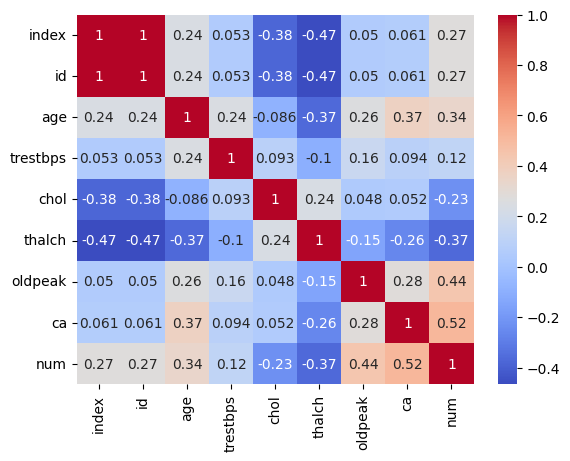

In [ ]:
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()